Analysis of How Multiple Factors Affect NFL Game Scores

Josh McCoy and Zach Goodman

[Link to website](https://joshmccoy2.github.io)

# Project Goals

The goal of our project is to analyze different factors that come into play which can affect the outcome of a NFL game's score. The team is also interested in what makes teams successful and unsuccessful. Some factors we will analyze include weather, home field advantages, offensive productivity, and defensive productivity. We will bring in other datasets that have team statistics for each year. These statistics will be items like passing yards, rushing yards, turnovers, sacks, etc. This will show us an overall picture because we will see what Vegas was thinking and what the actually productity of the team was at that specific time. Eventually, we want to create a systematic approach to predicting games/bets based on the most important factors that we identify.



# About The Dataset

We obtained this data from the "NFL Scores and Betting Data" dataset found on Kaggle.com. It contains NFL game results since 1966, and information about the betting odds of each game since 1979, along with information about the weather from each game. The betting odds include the favored team, the over/under of each game and where the game was played. It also contains information about each stadium and team that has ever existed in the NFL.

In [669]:
import pandas as pd
import numpy as np

stadiums_df = pd.read_csv("stadiums.csv", encoding="ISO-8859-1") #import Stadium info
teams_df = pd.read_csv("nfl_teams.csv", encoding="ISO-8859-1")  #import Team info
scores_df = pd.read_csv("spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info



Table 1:

This first table comes from "stadiums.csv", found in the "NFL Scores and Betting Data" dataset. It contains information about all of the stadiums that NFL games have been played in and ample information about each of them. For example, it has the stadium location, both in terms of city and coordinates, the opening and/or closing year of the arena, stadium type, weather type, capacity, and more. This dataframe can be useful in many different ways. Some questions we can answer by examining this dataframe is, which is the best stadium to play a football game in hot weather, or snowy weather? Does stadium capacity affect the outcome of games? Does the elevation, like in Denver, negatively affect the visiting team that isn't used to those conditions? 

In [670]:
stadiums_df

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.4846,-80.2144,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


Lets check the dtypes.

In [671]:
stadiums_df.dtypes

stadium_name                     object
stadium_location                 object
stadium_open                    float64
stadium_close                   float64
stadium_type                     object
stadium_address                  object
stadium_weather_station_code     object
stadium_weather_type             object
stadium_capacity                 object
stadium_surface                  object
STATION                          object
NAME                             object
LATITUDE                        float64
LONGITUDE                       float64
ELEVATION                       float64
dtype: object

checking the dtypes we see that they are properly formatted.

Table 2:

This table comes from "nfl_teams.csv", also found in the "NFL Scores and Betting Data" dataset. It contains information about every team that is currently in the league, or has ever been in the NFL. As you can see, it contains the full and short team names, team IDs, and the teams' conference and division, both before and after 2002.

In [672]:
teams_df.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN


The betting data starts in 1979. Therefore, we only want to see the years 1979-present day. 

In [673]:
scores_df = pd.read_csv("spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info

scores_df = scores_df[scores_df["schedule_season"]>=2014]  #limiting the dataFrame to dates 2014 and later
scores_df = scores_df[scores_df["schedule_playoff"]==False]
scores_df.head(3)


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
11076,9/4/2014,2014,1,False,Seattle Seahawks,36.0,16.0,Green Bay Packers,SEA,-4.5,46.5,CenturyLink Field,False,70.0,5.0,NaN,NaN
11077,9/7/2014,2014,1,False,Atlanta Falcons,37.0,34.0,New Orleans Saints,NO,-3.0,52,Georgia Dome,False,72.0,0.0,NaN,DOME
11078,9/7/2014,2014,1,False,Baltimore Ravens,16.0,23.0,Cincinnati Bengals,BAL,-1.0,42.5,M&T Bank Stadium,False,78.0,0.0,NaN,NaN


In [674]:
df_scores = pd.read_csv("spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info

playoffs = df_scores[df_scores["schedule_season"]>=2014]  #limiting the dataFrame to dates 2014 and later
playoffs = playoffs[playoffs["schedule_playoff"]==True]

playoffs.head(3)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
11332,1/3/2015,2014,Wildcard,True,Carolina Panthers,27.0,16.0,Arizona Cardinals,CAR,-5.5,37.5,Bank of America Stadium,False,51.0,6.0,NaN,NaN
11333,1/3/2015,2014,Wildcard,True,Pittsburgh Steelers,17.0,30.0,Baltimore Ravens,PIT,-3.0,45,Heinz Field,False,48.0,10.0,NaN,NaN
11334,1/4/2015,2014,Wildcard,True,Dallas Cowboys,24.0,20.0,Detroit Lions,DAL,-6.0,48.5,Cowboys Stadium,False,72.0,0.0,NaN,DOME


Now, we created a column to add in away and home wins, as well as away and home losses.

In [675]:
scores_df['away_win'] = np.where(scores_df['score_home'] < scores_df['score_away'], 1, 0)
scores_df['away_loss'] = np.where(scores_df['score_home'] > scores_df['score_away'], 1, 0)
scores_df['home_win'] = np.where(scores_df['score_home'] > scores_df['score_away'], 1, 0)
scores_df['home_loss'] = np.where(scores_df['score_home'] < scores_df['score_away'], 1, 0)
scores_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,away_win,away_loss,home_win,home_loss
11076,9/4/2014,2014,1,False,Seattle Seahawks,36.0,16.0,Green Bay Packers,SEA,-4.5,...,CenturyLink Field,False,70.0,5.0,NaN,NaN,0,1,1,0
11077,9/7/2014,2014,1,False,Atlanta Falcons,37.0,34.0,New Orleans Saints,NO,-3.0,...,Georgia Dome,False,72.0,0.0,NaN,DOME,0,1,1,0
11078,9/7/2014,2014,1,False,Baltimore Ravens,16.0,23.0,Cincinnati Bengals,BAL,-1.0,...,M&T Bank Stadium,False,78.0,0.0,NaN,NaN,1,0,0,1
11079,9/7/2014,2014,1,False,Chicago Bears,20.0,23.0,Buffalo Bills,CHI,-7.0,...,Soldier Field,False,77.0,7.0,NaN,NaN,1,0,0,1
11080,9/7/2014,2014,1,False,Dallas Cowboys,17.0,28.0,San Francisco 49ers,SF,-3.5,...,Cowboys Stadium,False,72.0,0.0,NaN,DOME,1,0,0,1


Now, we want to sum all these wins and losses to create a table to see the total success of these teams.

In [676]:
record = pd.DataFrame()
record["home_win"] = scores_df.groupby("team_home")[["home_win"]].sum() 
record["home_loss"] = scores_df.groupby("team_home")[["home_loss"]].sum() 
record["away_win"] = scores_df.groupby("team_away")[["away_win"]].sum()
record["away_loss"] = scores_df.groupby("team_away")[["away_loss"]].sum()
record["total_win"] = record["home_win"] + record["away_win"] 
record["total_loss"] = record["home_loss"] + record["away_loss"]
record = record.reset_index()
record = record.rename(columns={'team_home': 'team_name'})
record.head()

,team_name,home_win,home_loss,away_win,away_loss,total_win,total_loss
0,Arizona Cardinals,32,33,36,31,68,64
1,Atlanta Falcons,29,37,33,35,62,72
2,Baltimore Ravens,44,24,34,32,78,56
3,Buffalo Bills,43,24,34,33,77,57
4,Carolina Panthers,34,34,28,37,62,71


Finally, we will add this table (record) to our original team table (team_name).

In [677]:
teams_df = teams_df.merge(record, on=["team_name"], how='inner', suffixes=(False, False))
teams_df = teams_df.set_index("team_name")

In [678]:
teams_df.head()

,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002,home_win,home_loss,away_win,away_loss,total_win,total_loss
team_name,,,,,,,,,,,,,
Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West,32,33,36,31,68,64
Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West,29,37,33,35,62,72
Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central,44,24,34,32,78,56
Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East,43,24,34,33,77,57
Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West,34,34,28,37,62,71


Now, we will check the dtype. 

In [679]:
teams_df.dtypes

team_name_short            object
team_id                    object
team_id_pfr                object
team_conference            object
team_division              object
team_conference_pre2002    object
team_division_pre2002      object
home_win                    int64
home_loss                   int64
away_win                    int64
away_loss                   int64
total_win                   int64
total_loss                  int64
dtype: object

The dtypes for each are correct.

Now, we want to display the total wins by each NFL franchise.

In [680]:
import matplotlib.pyplot as plt

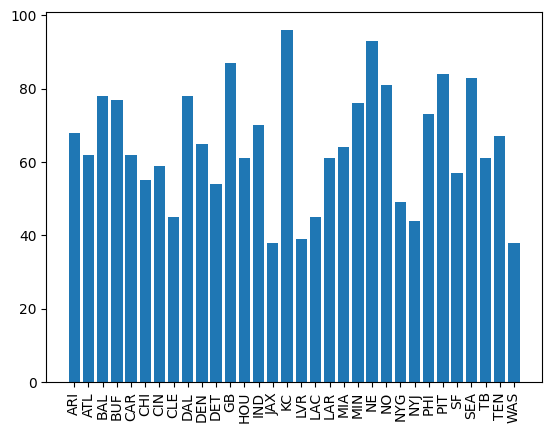

In [681]:
#teams1 = teams_df.groupby("team_id").total_win
#teams1.plot.bar()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

teams = teams_df.team_id
wins = teams_df.total_win

ax.bar(teams, wins)

plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='both', tight=None)


This bar graph shows how successful NFL franchises have been over time. We will eventually break this down by years in the NFL as some franchises are older than others. We want to identify who has the most successful win percentage overall and what makes them continue to win. 

# Cap (Below This Header) __________________________________________________

In [682]:
salary_cap = pd.read_csv("2014-thru-2020-cap-tables-1.csv", encoding="ISO-8859-1")#import salary cap info

salary_cap = salary_cap.sort_values(by=["team", "season", "pos"], ascending=True)
salary_cap = salary_cap.rename(columns={"name":"Player"})

In [683]:
salary_cap[salary_cap["team"]=="Green Bay Packers "]

,Player,pos,cap_hit,cap_percent,season,team
4154,Aaron Rodgers,QB,29672000,15.06,2019,Green Bay Packers


In [684]:
#Fixed an issue where "Green Bay Packers" was actually "Green Bay Packers "
salary_cap['team'] = salary_cap['team'].str.replace('Green Bay Packers ','Green Bay Packers')
salary_cap[salary_cap["team"]=="Green Bay Packers "]

,Player,pos,cap_hit,cap_percent,season,team


In [685]:
num = 14
for i in range(20-13):
    x = "cap" + str(num) 
    globals()[x] = pd.DataFrame(salary_cap)
    fullYr = int(str(20) + str(num))
    globals()[x] = globals()[x][globals()[x]["season"]==fullYr]
    num += 1

In [686]:
cap20

,Player,pos,cap_hit,cap_percent,season,team
148,Mason Cole,C,977629,0.50,2020,Arizona Cardinals
11,Patrick Peterson,CB,13184588,6.71,2020,Arizona Cardinals
105,Byron Murphy,CB,1815795,0.92,2020,Arizona Cardinals
181,Dre Kirkpatrick,CB,750000,0.38,2020,Arizona Cardinals
199,Kevin Peterson,CB,679416,0.35,2020,Arizona Cardinals
...,...,...,...,...,...,...
11785,Antonio Gandy-Golden,WR,622420,0.30,2020,Washington Football Team
11786,Steven Sims Jr.,WR,621176,0.30,2020,Washington Football Team
11787,Isaiah Wright,WR,611666,0.29,2020,Washington Football Team
11788,Cam Sims,WR,595588,0.28,2020,Washington Football Team


array([<AxesSubplot: ylabel='cap_percent'>], dtype=object)

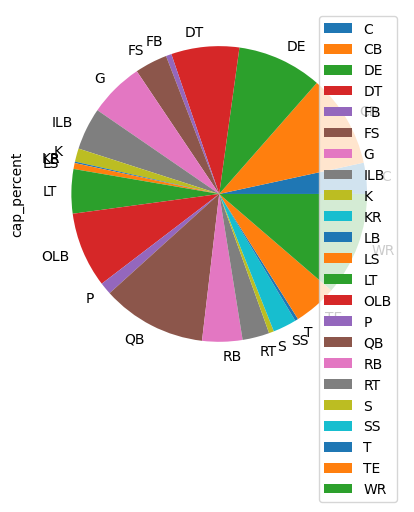

In [687]:
pie_cap = salary_cap.drop(columns = ["Player", "cap_hit"])
pie_cap = salary_cap.groupby("pos")[["cap_percent"]].sum()
pie_cap
pie_cap.plot.pie(subplots=True)

In [688]:
seasonRecord = pd.DataFrame()
seasonRecord["Season"] = scores_df["schedule_season"]
seasonRecord["Home Team"] = scores_df["team_home"]
seasonRecord["Away Team"] = scores_df["team_away"]
seasonRecord["home_win"] = scores_df["home_win"]
seasonRecord["away_win"] = scores_df["away_win"]
seasonRecord["away_loss"] = scores_df["away_loss"]
seasonRecord["home_loss"] = scores_df["home_loss"]
seasonRecord = seasonRecord[seasonRecord["Season"]>=2014]

In [689]:
hometeam_wins = seasonRecord.groupby(["Home Team","Season"])[["home_win"]].sum() 
hometeam_loss = seasonRecord.groupby(["Home Team","Season"])[["home_loss"]].sum() 
awayteam_loss = seasonRecord.groupby(["Away Team","Season"])[["away_loss"]].sum() 
awayteam_wins = seasonRecord.groupby(["Away Team","Season"])[["away_win"]].sum()

In [690]:
groupby_names = [hometeam_wins, hometeam_loss, awayteam_wins, awayteam_loss]
piv_names = [homeTeamWinsPivot, homeTeamLossPivot, awayTeamWinsPivot, awayTeamLossPivot]
colNames = ["home_win", "home_loss", "away_win", "away_loss"]
indexNames = ["Home Team", "Home Team", "Away Team", "Away Team"]
dfs = [homeWin, homeLoss, awayWin, awayLoss]

for i in range(4):
    piv_names[i] = pd.pivot_table(groupby_names[i], values=colNames[i], index=indexNames[i], columns="Season")
    dfs[i] = piv_names[i].reset_index()
    dfs[i] = dfs[i].rename(columns={indexNames[i]:"Team"})
    dfs[i] = dfs[i].set_index(["Team"])

In [691]:
seasonWins = pd.DataFrame()
seasonLoss = pd.DataFrame()
season_yrs = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for year in range(len(season_yrs)):
    stringW = str(season_yrs[year]) + " W"
    stringL = str(season_yrs[year]) + " L"
    seasonWins[stringW] = homeWin[season_yrs[year]] + awayWin[season_yrs[year]]
    seasonLoss[stringL] = homeLoss[season_yrs[year]] + awayLoss[season_yrs[year]]

In [692]:
year_rec = pd.DataFrame()
year_rec = seasonWins.merge(seasonLoss, on=["Team"])
insert_num = 1
for year in range(len(season_yrs)):
    stringL = str(season_yrs[year]) + " L"
    column_to_move = year_rec.pop(stringL)
    year_rec.insert(insert_num, stringL, column_to_move)
    insert_num += 2

Taking the STD of wins per team for each season from 2014-2020.

In [693]:
seasonWins_to2020 = pd.DataFrame(seasonWins)
seasonWins_to2020 = seasonWins_to2020.drop(columns=["2021 W", "2022 W"])
seasonWins_to2020.std().mean()

3.1742396172056004

In [694]:
seasonWins_to2020.mean()

2014 W    7.96875
2015 W    8.00000
2016 W    7.93750
2017 W    8.00000
2018 W    7.93750
2019 W    7.96875
2020 W    7.96875
dtype: float64

The above shows us that the average amount of wins per season is approximately 8. (It is only not 8 whenever there are one or a few ties that season.) Let's generalize that 8 wins is the average. Therefore, 0-4 wins classify a team as "Bad", 5-11 wins classify a team as "Average", and 12-16 wins classify a team as "Good".

In [695]:
yrNum = 14
caps = [cap14["team"], cap15["team"], cap16["team"], cap17["team"], cap18["team"], cap19["team"], cap20["team"]]
for i in range(20-13):
    bigTeam = "big_team_list" + str(yrNum)
    tmLst = "team_list" + str(yrNum)
    globals()[tmLst] = []
    
    globals()[bigTeam] = caps[i]
    globals()[bigTeam] = globals()[bigTeam].values.tolist()
    
    [globals()[tmLst].append(x) for x in globals()[bigTeam] if x not in globals()[tmLst]]
    yrNum += 1

In [696]:
number = 2014
Win_Values = [16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]
pos_list = ["C", "CB", "DE", "DT", "FB", "FS", "G", "ILB", "K", "KR", "LB", "LS", "LT", "OLB", "P", "QB", "RB", "RT", "S", "SS", "T", "TE", "WR"] 


for i in range(20-13):
    var = "win" + str(number) 
    globals()[var] = pd.DataFrame()
    globals()[var]["Win Values"] = Win_Values
    globals()[var] = globals()[var].set_index("Win Values")
    
        
    for position in pos_list:
        globals()[var][position] = 0 
    
    number += 1

In [697]:
season_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
year = 2014
yr = 14
# stringW = str(season_yrs[year]) + " W"

for year in range(len(season_years)):
    
    lst = "team_list" + str(yr)
    lst = globals()[lst]
    
    cap = "cap" + str(yr)
    cap = globals()[cap]
    
    stringW = str(season_yrs[year]) + " W"
    
    df_name = "win" + str(season_years[year])
    df_name = globals()[df_name]
    
    for team in lst:
        winScore = year_rec[stringW].loc[team]
    
        df = cap[cap["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)
        df = df.reset_index()

        for position in pos_list:
            for i in range(len(df["pos"])):
                if df.loc[i]["pos"] == position:
                    df_name.loc[winScore][position] = df_name.loc[winScore][position] + 1
    
    year += 1
    yr += 1

In [719]:
#Making it more readable to be transformed into stacked bar graph
season_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
for year in range(len(season_years)):
    transposed = "w" + str(season_years[year])
    og = "win" + str(season_years[year])
    transposed = globals()[transposed]
    og = globals()[og]
    
    transposed = pd.DataFrame.transpose(og)

In [720]:
#All the stats added up from seasons 2014-2020
w14to20 = pd.DataFrame()
w14to20 = w2014 + w2015 + w2016 + w2017 + w2018 + w2019 + w2020
w14to20.head()

Win Values,16.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0
C,0,1,0,4,2,6,4,4,3,9,3,2,4,1,1,0,1
CB,0,0,2,7,8,12,15,15,10,13,13,14,9,5,3,2,0
DE,0,1,1,10,7,12,17,10,8,23,16,12,3,8,3,0,1
DT,0,0,1,3,3,9,9,13,6,10,10,5,5,4,2,0,0
FB,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [701]:
good = pd.DataFrame()
good[16.0] = w14to20[16.0]
good[15.0] = w14to20[15.0]
good[14.0] = w14to20[14.0]
good[13.0] = w14to20[13.0]
good[12.0] = w14to20[12.0]
average = pd.DataFrame()
average[11.0] = w14to20[11.0]
average[10.0] = w14to20[10.0]
average[9.0] = w14to20[9.0]
average[8.0] = w14to20[8.0]
average[7.0] = w14to20[7.0]
average[6.0] = w14to20[6.0]
average[5.0] = w14to20[5.0]
bad = pd.DataFrame()
bad[4.0] = w14to20[4.0]
bad[3.0] = w14to20[3.0]
bad[2.0] = w14to20[2.0]
bad[1.0] = w14to20[1.0]
bad[0.0] = w14to20[0.0]

In [702]:
pos_freq = pd.DataFrame(index=w14to20.index, columns=["Good", "Average", "Bad"])
pos_freq["Good"] = 0
pos_freq["Average"] = 0
pos_freq["Bad"] = 0
pos_freq["Good"] = good.sum(axis=1)
pos_freq["Average"] = average.sum(axis=1)
pos_freq["Bad"] = bad.sum(axis=1)
pos_freq.sort_values(by=["Good"], ascending=False)
#top 5 for Good: QB, LT, WR, OLB, CB
pos_freq.sort_values(by=["Average"], ascending=False)
#top 5 for Average: QB, DE, WR, CB, OLB
pos_freq.sort_values(by=["Bad"], ascending=False)

#top 5 for Good: QB, LT, WR, OLB, CB
#top 5 for Average: QB, DE, WR, CB, OLB
#top 5 for Bad: WR, CB, QB, DE, OLB
pos_freq.sum(axis=1).sort_values(ascending=False)

QB     145
WR     140
DE     132
CB     128
OLB    108
LT      91
DT      80
G       57
C       45
ILB     44
TE      42
RB      38
FS      32
RT      21
SS      14
K        1
FB       1
S        1
KR       0
LB       0
P        0
T        0
LS       0
dtype: int64

In [703]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.pro-football-reference.com/years/2020/defense.htm'
#providing a user-agent header
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

b = requests.get(url, headers=headers)
soup = BeautifulSoup(b.content)
def2020 = pd.read_html(str(soup.find("table")))
def2020 = def2020[0]
def2020 = def2020.fillna(value=0)
def2020.columns = def2020.columns.droplevel()
def2020 = def2020.drop(columns=["Yds", "TD", "Lng", "Fmb", "Sfty"])
def2020 = def2020.rename(columns={"Tm":"Team", "G":"Played", "GS":"Started", "PD":"Pass Def", "Sk":"Sack"})
def2020 = def2020.query("Pos in ('DE', 'CB', 'OLB')")
def2020.head()


,Rk,Player,Team,Age,Pos,Played,Started,Int,Pass Def,FF,FR,Sack,Comb,Solo,Ast,TFL,QBHits
229,223,DeMarcus Lawrence,DAL,28,DE,16,15,0,2,4,1,6.5,58,34,24,11,10
232,226,Brian Poole,NYJ,28,CB,9,7,2,7,0,0,1.0,44,34,10,2,2
237,231,Chris Claybrooks,JAX,23,CB,13,4,0,3,0,0,0.0,39,33,6,1,0
250,243,Stephon Tuitt,PIT,27,DE,15,15,0,3,2,0,11.0,45,33,12,10,25
302,294,Darqueze Dennard,ATL,29,CB,8,6,1,5,0,0,0.0,36,28,8,2,0


In [704]:
def2020["Full Team"] = def2020["Team"].map({
    "HOU": "Houston Texans",
    "CHI": "Chicago Bears",
    "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets",
    "NYG": "New York Giants",
    "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals",
    "DAL": "Dallas Cowboys",
    "TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts",
    "JAX": "Jacksonville Jaguars",
    "SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers",
    "CIN": "Cincinnati Bengals",
    "ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos",
    "NWE": "New England Patriots",
    "PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints",
    "LAR": "Los Angeles Rams",
    "MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers",
    "KAN": "Kansas City Chiefs",
    "LAC": "Los Angeles Chargers",
    "BAL": "Baltimore Ravens",
    "GNB": "Green Bay Packers",
    "MIA": "Miami Dolphins",
    "DET": "Detroit Lions",
    "WAS": "Washington Football Team",
    "LVR": "Las Vegas Raiders",
    "PIT": "Pittsburgh Steelers",
    "CLE": "Cleveland Browns"
})

In [705]:
del def2020["Team"]

In [706]:
column_to_move = def2020.pop("Full Team")
def2020.insert(2, "Full Team", column_to_move)
def2020 = def2020.rename(columns={"Full Team":"Team"})

In [707]:
test = pd.DataFrame()
test = salary_cap[salary_cap["season"]==2020]
test = test[test["team"]=="New York Giants"]
test.sort_values(by="cap_percent", ascending=False).head()
test = def2020.merge(test, on=["Player"])
test

,Rk,Player,Team,Age,Pos,Played,Started,Int,Pass Def,FF,...,Comb,Solo,Ast,TFL,QBHits,pos,cap_hit,cap_percent,season,team
0,609,Jabaal Sheard,NaN,31,DE,10,3,0,1,1,...,19,10,9,2,6,DE,485298,0.25,2020,New York Giants
1,767,Madre Harper,New York Giants,23,CB,9,0,0,0,0,...,5,5,0,0,0,CB,502352,0.25,2020,New York Giants
2,954,Niko Lalos,New York Giants,23,DE,6,0,1,1,0,...,6,2,4,0,0,DE,143529,0.07,2020,New York Giants


<AxesSubplot: >

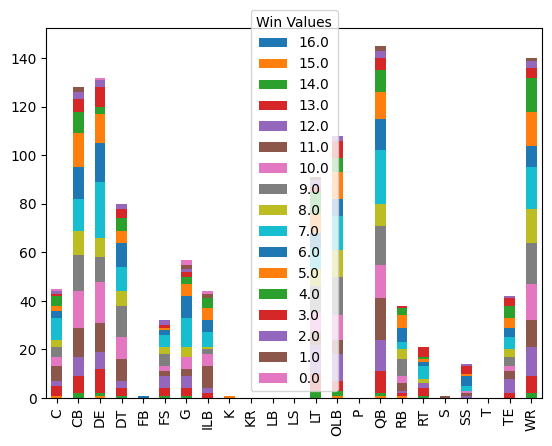

In [708]:
w14to20.plot.bar(stacked=True)

In [709]:
cap = salary_cap.drop(columns = ["Player", "cap_hit"])
cap = pd.pivot_table(cap, index=["season"], columns = ["team", "pos"], values = "cap_percent")
cap

team   Arizona Cardinals                                                \
pos                    C        CB        DE        DT    FB        FS   
season                                                                   
2014               3.040  2.997500  2.565000  0.708000   NaN  0.730000   
2015               0.920  3.665000  2.132000  0.856000   NaN  0.530000   
2016               0.530  1.588333  3.027500  0.643333   NaN  0.535000   
2017               0.550  2.330000  1.140000  0.951667   NaN  4.710000   
2018               0.340  2.996667  1.770000  0.666667  0.35  1.176667   
2019               0.605  1.024000  0.170000  0.732500   NaN       NaN   
2020               0.500  2.090000  0.406667  0.130000   NaN  0.420000   

team                                    ... Washington Redskins        \
pos            G       ILB     K    LS  ...                 OLB     P   
season                                  ...                             
2014    0.962500  0.570000  0.31  0.80  ...            2.396000  0.32   
2015    2.257500  1.145000  0.34  0.45  ...            0.965714  0.35   
2016    1.103333  0.363333  0.38  0.35  ...            1.370000  0.52   
2017    0.760000  0.900000  1.45  0.31  ...            1.251429  0.85   
2018    0.160000  0.270000  0.09  0.49  ...            1.673333  0.98   
2019    1.810000  1.172000  0.33  0.54  ...            0.920000  1.03   
2020    2.387500  1.868000  0.06  0.59  ...                 NaN   NaN   

team                                                                         
pos           QB      RB     RT      S        SS      T        TE        WR  
season                                                                       
2014    1.790000  0.5075  0.440  0.480  0.263333  0.430  0.697500  2.295000  
2015    2.016667  0.4680  0.500    NaN  0.503333  0.450  0.660000  2.800000  
2016    4.576667  0.3225  0.400  0.500  0.253333    NaN  1.376667  2.600000  
2017    7.800000  0.1175  2.050  0.030  0.350000  0.085  1.146667  0.455000  
2018    0.100000  0.6950  3.020  0.025  0.630000  0.030  0.847500  0.642000  
2019    1.586667  0.8450  2.305  0.200  1.000000  0.255  0.200000  0.181667  
2020         NaN     NaN    NaN    NaN       NaN    NaN       NaN       NaN  

[7 rows x 779 columns]

# Closing Thoughts and Final Goals

Our main goal is to predict what teams are able to cover their Vegas betting odds by identifying what factors make most NFL teams succsessful. We first want to identify how often Vegas is right in their predictions and try to analyze what factors Vegas favors the most when setting lines. Once we have a basic understanding of the Vegas lines system, we want to create our own predictive model that can take advantage of Vegas betting lines that we think our favorable. We will do this by adding outside datasets that have the teams individual statistics. If we can identify what makes teams successful and what is a good matchup for a team, we believe our model could have some success. Some questions we want to answer are: "Is a passing, rushing, or balanced offense more effective?" "What makes a favorable matchup for a specific team?" "What players have had the largest impact when switching teams?" and "How often are Vegas favored teams actually making the playoffs?". 